K-Nearest-Neighbors with Sklearn and Scipy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist

Part A: 

- Need to generate a 1000 data points from in increasing dimensions from 2 to 10.
- Each dimension should follow a uniform random variable between -1 and 1.
- for each data point in each dimension, calculate the data points euclidean distance from the origin.
count the number of data points less than or equal to 1.
- Divide the count by the total number of data points (1,000) to get the fraction of data points within the unit hypersphere for each dimension.
- plot the fraction vs dimension as dimensions increase 



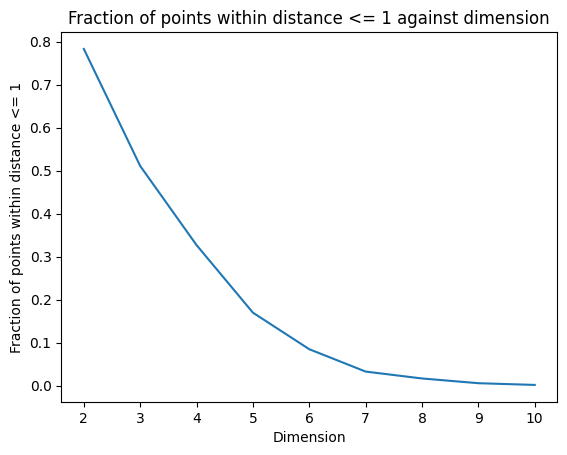

In [36]:
np.random.seed(78)

def generate_points(d: int):
    return np.random.uniform(-1, 1, (1000, d))

x = range(2,11)
fractions = []


def calculate_fractions(x: range):
     
   # for each data point in each dimension calculate the distance
   for dimension in x:
        # generate 1000 random points in d dimensions and calculate the distance
        count = 0    
        points = generate_points(dimension)
        origin_distance = np.linalg.norm(points, axis=1)
        
        # for each distance calculate the number of points within the distance <= 1
        for i in range(0, len(origin_distance)):
            if origin_distance[i] <= 1:
                count += 1
         
        # calculate the fraction for each dimension. 
        fraction = count/1000
        fractions.append(fraction)

def plot_fractions(x: range, fractions: list):
    plt.plot(x, fractions)
    plt.xlabel('Dimension')
    plt.ylabel('Fraction of points within distance <= 1')
    plt.title('Fraction of points within distance <= 1 against dimension')
    plt.show()
    
calculate_fractions(x)
plot_fractions(x, fractions)



Part B:

- Calculate distance between a data point and it's nearest neighbor (k = 1)
- the mean distances between any pair of data points
- then, divide the mean distance between a data point and it's nearest neighbor by mean distance of any pair of data points.
- do this for each dimension from 2 to 10 and plot the ratios vs the dimensions 
- curse of dimensionality.


[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

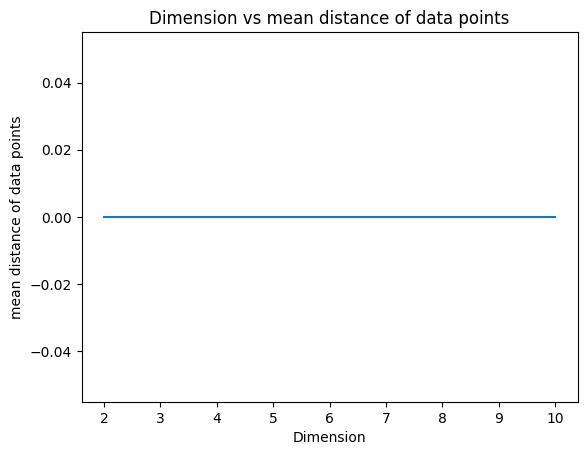

In [54]:
np.random.seed(43)

# Function to calculate mean distance between any pair of data points
def mean_pairs(points: np.ndarray):
    pair_distances = pdist(points)
    return np.mean(pair_distances)

def calculate_mean_nn_dist(points: np.ndarray):   
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nbrs.fit(points)
    # figure out this distances k neighbor points function.
    # try another loop going through pts.  
    distances, _ = nbrs.kneighbors(points)
    mean_nn_distance = np.mean(distances) 
    mean_pairwise_dist = mean_pairs(points)
    ratio = mean_nn_distance / mean_pairwise_dist
    return ratio

ratios = []

def get_ratios():   
    for dimension in x:   
        points = generate_points(dimension)   
        ratio = calculate_mean_nn_dist(points) 
        ratios.append(ratio)

def plot_ratios(x, ratios):
    plt.plot(x, ratios)
    plt.xlabel('Dimension')
    plt.ylabel('mean distance of data points')
    plt.title('Dimension vs mean distance of data points')
    plt.show()


get_ratios()
plot_ratios(x, ratios)